# Вариабельность данных

## План урока

* Зачем нужно определять вариабельность данных?
* Какие метрики относятся к оценкам вариабельности и зачем нам нужны разные оценки?
* Практика в jupyter notebook.

<b>Вариабельность (дисперсность)</b> показывает, насколько сильно различаются между собой значения признака.

Один из способов измерения вариабельности — это оценка типичных отклонений признаков от центрального значения.

## 1. Синтетические данные

In [ ]:
# Количество товаров в корзине пользователя на маркетплейсе
x = [10, 2, 2, 5, 26, 6]

# добавили пользователя-перекупщика
y = [10, 2, 2, 5, 26, 6, 100, 1500, 2000]

In [ ]:
import seaborn as sns

# настройки размера и цвета графиков
sns.set(rc={'figure.figsize':(11.27, 5.7)})

<AxesSubplot:ylabel='Count'>

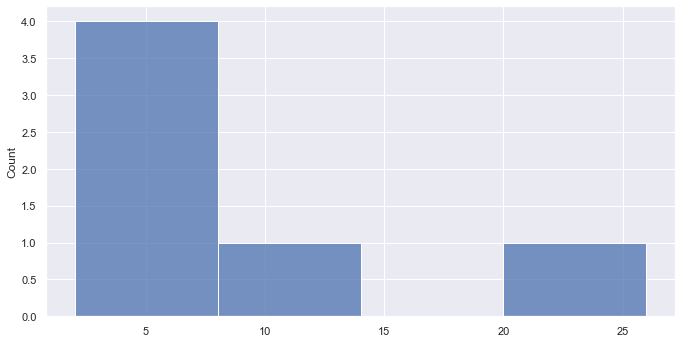

In [ ]:
sns.histplot(x)

<AxesSubplot:ylabel='Count'>

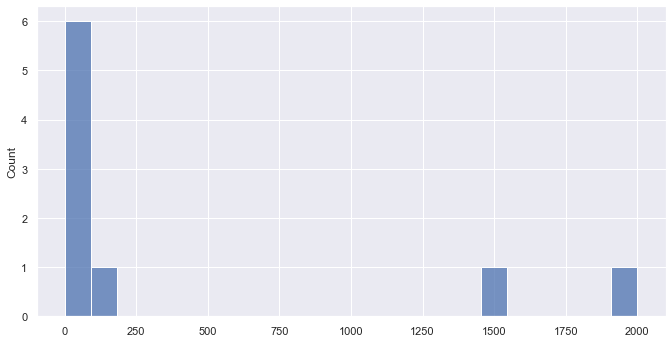

In [ ]:
sns.histplot(y)

### Дисперсия

<b>Выборочная смещенная дисперсия</b>
$$D = \frac{\sum_{i = 1}^{n}(x_i - \bar{x})^2}{n}$$

<b>Выборочная несмещенная дисперсия</b>
$$D = \frac{\sum_{i = 1}^{n}(x_i - \bar{x})^2}{n - 1}$$

$n$ – число элементов выборки

$x_{i}$ – элемент выборки

$\bar{x}$ – выборочное среднее

---
Выборочная смещенная дисперсия дает заниженное значение. Это значит, что при большом количестве экспериментов выборочная дисперсия будет давать смещенное относительно истинного значения генеральной совокупности значение.

In [ ]:
import numpy as np

In [ ]:
d_x = np.var(x)
d_x

68.58333333333333

In [ ]:
d_y = np.var(y)
d_y

531084.0

---
* Чем сильнее разбросаны данные в выборке, тем больше дисперсия.
* Дисперсия сильно подвержена влиянию хвостов распределения (выбросов).



### Среднеквадратичное отклонение:

$$\sigma =\sqrt{\frac{\sum_{i = 1}^{n}(x_i - \bar{x})^2}{n}} = \sqrt{D}$$

$n$ – число элементов выборки

$x_{i}$ – элемент выборки

$\bar{x}$ – выборочное среднее

---
* Чем сильнее разбросаны данные в выборке, тем больше среднеквадратическое отклонение.
* Стандартное отклонение легче интерпретировать, чем дисперсию, поскольку стандартное отклонение выражается в той же единице измерения, что и наблюдения.



In [ ]:
s_x = np.std(x)
s_x

8.281505499203229

In [ ]:
s_y = np.std(y)
s_y

728.7551028980861

<b>Размах:</b>

In [ ]:
np.max(x), np.min(x)

(26, 2)

In [ ]:
np.max(x) - np.min(x)

24

### Квантили, перцентили, квартили и межквартильный размах:

<b>Квантили</b> - значение, ниже которого лежит данная часть выборки.

* N квантиль — это такое число, ниже которого лежит N часть выборки
* 0.3 квантиль — это такое число, что ниже него лежит 0.3 часть выборки

<b>Перцентиль</b>

- $N$-й перцентиль — это такое число, что $N%$ элементов массива меньше или равны этому значению

- $10$-й перцентиль — это такое число, что $10%$ элементов массива меньше или равны этому значению

Величины, которые делят упорядоченный набор значений на 4 равные группы,

т.е. 25-й, 50-й и 75-й процентили (либо 0.25, 0.5, 0.75 квантиль), называются <b>квартилями</b>.

50-й процентиль (0.5 квантиль) — это медиана.

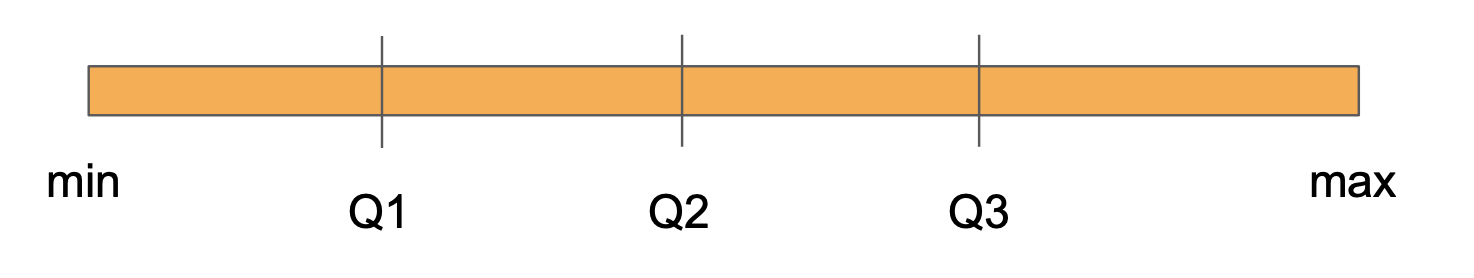</img>

In [ ]:
q1 = np.quantile(x, q=0.25)
q3 = np.quantile(x, q=0.75)
q1, q3

(2.75, 9.0)

In [ ]:
# межквартильный размах
q3 - q1

6.25

In [ ]:
q2 = np.quantile(x, q=0.5)
median = np.median(x)

q2, median

(5.5, 5.5)

In [ ]:
p1 = np.percentile(x, q=25)
p3 = np.percentile(x, q=75)
p1, p3

(2.75, 9.0)

<AxesSubplot:>

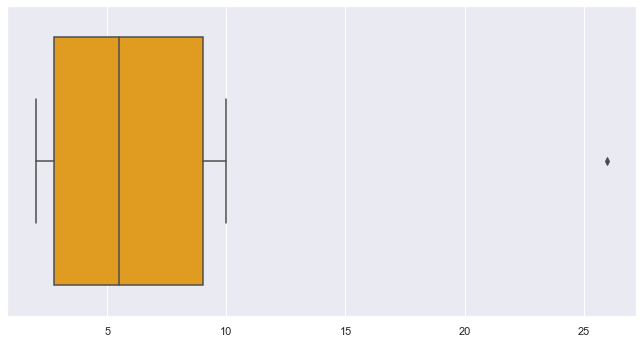

In [ ]:
sns.boxplot(x=x, color='orange')

## 2. Боевой датасет

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
data.shape

(9800, 18)

In [ ]:
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
data.Sales

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9795      3.7980
9796     10.3680
9797    235.1880
9798     26.3760
9799     10.3840
Name: Sales, Length: 9800, dtype: float64

<b>Дисперсия:</b>

In [ ]:
np.var(data.Sales)

392652.5015683523

<b>Среднеквадратичное отклонение:</b>

In [ ]:
np.std(data.Sales)

626.6199019887193

<b>Размах:</b>

In [ ]:
np.max(data.Sales), np.min(data.Sales)

(22638.48, 0.444)

In [ ]:
np.max(data.Sales) - np.min(data.Sales)

22638.036

<b>Перцентили, квартили и межквартильный размах:</b>

In [ ]:
q1 = np.quantile(data.Sales, q=0.25)
q3 = np.quantile(data.Sales, q=0.75)
q1, q3

(17.248, 210.60500000000002)

In [ ]:
# для наглядности уменьшим вариабельность данных
data_cut = data.Sales[data.Sales < 400]

<AxesSubplot:xlabel='Sales'>

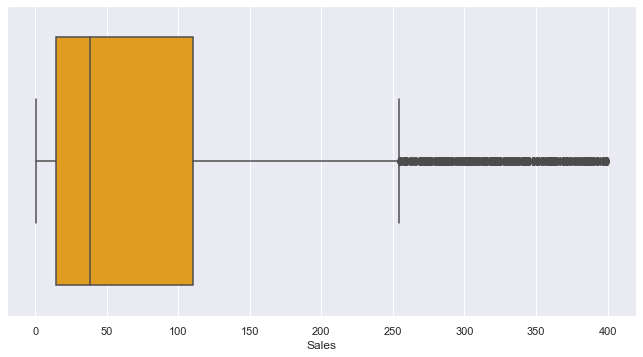

In [ ]:
sns.boxplot(x = data_cut, color='orange')

---
## Итоги:
1. Вариабельность данных необходимо определять для оценки того, насколько сильно различаются между собой значения признака.
2. Для оценки вариабельности необходимо в совокупности оценить следующие статистики:
    - дисперсию или среднеквадратичное отклонение;
    - минимальное и маскимальное значение выборки и размах;
    - межквартильный размах.
4. Для наглядного представления дисперсности данных полезно строить график "ящик с усами".